# Table of Contents

## Introduction
The goal of this project is to analyze the courses_data Course dataset. To perform this analysis, we will use concepts from Data Visualization & Data Analysis.
- [Jupyter notebook setup](#jupyter-notebook-setup)

## Data Cleaning
- [Renaming columns and indexing](#renaming-columns-and-indexing)
- [Converting data types](#converting-data-types)
- [Checking for duplicate records](#checking-for-duplicate-records)
- [Checking for missing values and datatypes](#checking-for-missing-values-and-datatypes)

## Exploratory Data Analysis
### 1. Distribution between students enrolled by course title, including schools, ratings and number of courses offered: (Top 10 and Bottom 10)

- [1.1 - Distribution between students enrolled by course title - Top 10 schools and ratings](#1.1---distribution-between-students-enrolled-by-course-title---top-10-schools-and-ratings)
- [1.2 - Distribution between students enrolled by course title - Bottom 10 schools and ratings](#12---distribution-between-students-enrolled-by-course-title---bottom-10-schools-and-ratings)
- [1.3 - Number of courses offered by Universities / Companies (Top 10)](#13---number-of-courses-offered-by-universities-/-companies-(top-10))
- [1.4 - Number of students enrolled by Universities / Companies (Top 10)](#14---number-of-students-enrolled-by-universities-/-companies-(top-10))
- [1.5 - Conclusion between students enrolled by course title, including schools, ratings and number of courses offered](#15---conclusion-between-students-enrolled-by-course-title,-including-schools,-ratings-and-number-of-courses-offered)

### 2. Distributions and correlation of course rating and student enrolled
- [2.1 - Distributions and correlation histograms, heatmap and scatterplot](#21---distributions-and-correlation-of-course-rating-and-student-enrolled)
- [2.2 - Conclusion for distributions and correlation of course rating and student enrolled](#22---conclusion-for-distributions-and-correlation-of-course-rating-and-student-enrolled)

### 3. Distributions of course difficulty levels and course ratings comparison
- [3.1 - Distribution of course difficulty levels and course ratings graphs](#31---distribution-of-course-difficulty-levels-and-course-ratings-graphs)
- [3.2 - Conclusion for distributions of course difficulty levels and course ratings comparison](#32---conclusion-for-distributions-of-course-difficulty-levels-and-course-ratings-comparison)

### 4. Impact on ratings and enrollments by certification type
- [4.1 - Impact on ratings and enrollments by certification type graphs](#41---impact-on-ratings-and-enrollments-by-certification-type-graphs)
- [4.2 - Conclusion for the impact on ratings and enrollments by certification type](#42---conclusion-for-the-impact-on-ratings-and-enrollments-by-certification-type)

### 5. Distribution of course difficulty levels and the number of students enrolled
- [5.1 - Distribution of course difficulty levels and the number of students enrolled graphs](#51---distribution-of-course-difficulty-levels-and-the-number-of-students-enrolled-graphs)
- [5.2 - Conclusion for distribution of course difficulty levels and the number of students enrolled](#52---conclusion-for-distribution-of-course-difficulty-levels-and-the-number-of-students-enrolled)

### 6. Suggestions about how this analysis can be improved
- [Suggestions and improvements for this analysys](#suggestions-and-improvements-for-this-analysys)

### Jupyter notebook setup

In [1]:
%load_ext pycodestyle_magic
#%reload_ext pycodestyle_magic
%pycodestyle_on
%flake8_on
%flake8_on --max_line_length 79
%matplotlib inline

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

courses_data = pd.read_csv("../../../assets/data/courses_data.csv")
courses_data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [2]:
# Check dataframe shape
print(courses_data.shape)

(891, 7)


### Renaming columns and indexing

In [3]:
# Rename the "Unnamed: 0" column to "Course Id"
courses_data.rename(columns={'Unnamed: 0': 'course_id'}, inplace=True)

# Set the "Course Id" column as the index
courses_data.set_index('course_id', inplace=True)
courses_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
course_id,,,,,,
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Converting data types
Since the `course_students_enrolled` column is a string and it relates to a number of students enrolled, for further analysis, a conversion to an integer is necessary. The following steps are taken to convert the string(object) to an integer:

In [4]:
# Define the conversion dictionary
conversion_dict = {'k': '*1e3', 'm': '*1e6'}

# Replace characters and evaluate expressions
courses_data['course_students_enrolled'] = (
    courses_data['course_students_enrolled']
    .replace(conversion_dict, regex=True)
    .map(pd.eval)
    .astype(int)
)
courses_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
course_id,,,,,,
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


### Checking for duplicate records

In [5]:
# Check for duplicate rows (samples)
duplicate_samples = courses_data[courses_data.duplicated()]
print("Duplicate Samples:")
print(duplicate_samples)

Duplicate Samples:
Empty DataFrame
Columns: [course_title, course_organization, course_Certificate_type, course_rating, course_difficulty, course_students_enrolled]
Index: []


There is no need to check for duplicated features since it is a simple dataset with only 7 features, so it is visible that there are no duplicate features. But in case of a bigger dataset, it is important to check for duplicated features and a similar approach as adopted above can be applied.

Since differente organizations can offer same course (`course_title`), with different certification types, it may occur duplication for this feature. It is considered then, to analyze the certification type, to check if they are the same as well. If so, the course_title is considered the same.

As shown below, the count for distinct courses is 888. But considering the organization and certification type, it is possible to confirm all the courses are unique.

Also is printed the courses that have the same name, but have different certification types provided by different organizations, so they can be considered as unique.

In [6]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

courses = courses_data[['course_title',
                    'course_organization',
                    'course_Certificate_type']]
distinct_course_titles_count = courses['course_title'].nunique()
number_of_courses_offered = courses_data['course_title'].count()
print()

# Define the columns to consider when looking for duplicates
columns = ['course_title']

# Find duplicates
duplicates = courses_data[courses_data.duplicated(subset=columns,
                                          keep=False)]

# Select and reorder the columns of interest
duplicates = duplicates[['course_title',
                         'course_Certificate_type',
                         'course_organization']]
# Print findings
print("Number of distinct courses offered:", distinct_course_titles_count)
print("Number of courses offered:", number_of_courses_offered)
duplicates.head(6)


Number of distinct courses offered: 888
Number of courses offered: 891


,course_title,course_Certificate_type,course_organization
course_id,,,
756,Developing Your Musicianship,COURSE,Berklee College of Music
205,Developing Your Musicianship,SPECIALIZATION,Berklee College of Music
181,Machine Learning,SPECIALIZATION,University of Washington
6,Machine Learning,COURSE,Stanford University
241,Marketing Digital,COURSE,Universidade de São Paulo
325,Marketing Digital,SPECIALIZATION,Universidad Austral


### Checking for missing values and datatypes

In [7]:
# Check for missing values by columns
missing_values = courses_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


In [8]:
column_dtypes = courses_data.dtypes
print("Data types of each column:")
print(column_dtypes)

Data types of each column:
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled      int64
dtype: object


## Exploratory Data Analysis

In [9]:
courses_data.describe().round(2)

,course_rating,course_students_enrolled
count,891.00,891.00
mean,4.68,90552.08
std,0.16,181936.45
min,3.30,1500.00
25%,4.60,17500.00
50%,4.70,42000.00
75%,4.80,99500.00
max,5.00,3200000.00


### Distribution of students enrolled
The boxplot below provides a graphical representation of the distribution of this dataset. It provides a summary of key statistical measures such as the median, quartiles, and potential outliers.
The median (line inside the rectangle) means that half of the data points fall below this line, and half fall above it. The box represents the interquartile range (IQR), which is the middle 50% of the data. The whiskers extend from the edges of the box to the minimum and maximum values within a certain range. Data points beyond the whiskers may be considered outliers.

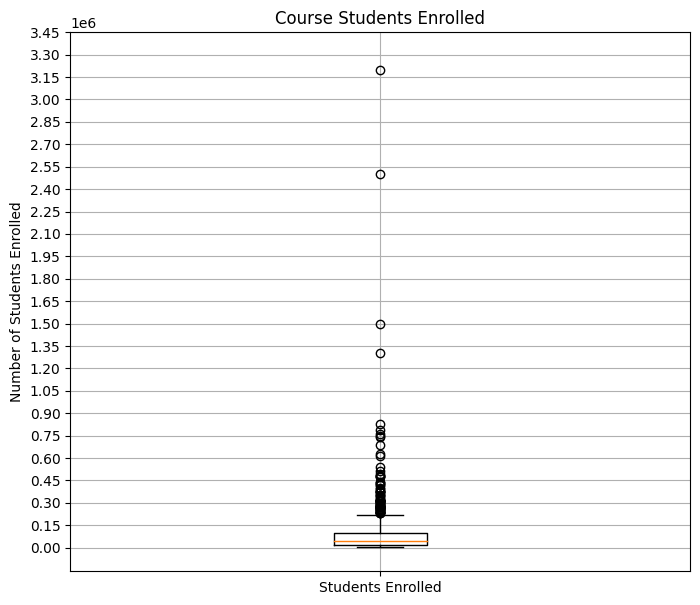

In [10]:
plt.figure(figsize=(8, 7))
plt.boxplot(courses_data['course_students_enrolled'])
plt.title('Course Students Enrolled')
plt.ylabel('Number of Students Enrolled')
plt.xticks([1], ['Students Enrolled'])

# Determining the y axis values
plt.yticks(np.arange(0, 3500000, step=150000))

plt.grid(True)
plt.show()

### 1.1 - Distribution between students enrolled by course title - Top 10 schools and ratings
Based on the analysis above it is interesting to see what are the most popular courses and the relation between the enrolled students. The investigation aims to analyze which courses have the majority of students enrolled, based on the top 10 courses, since this have 891 distinct courses, it would not be visible to display all. Also it is a good way to understand and confirm the outliers in the dataset.

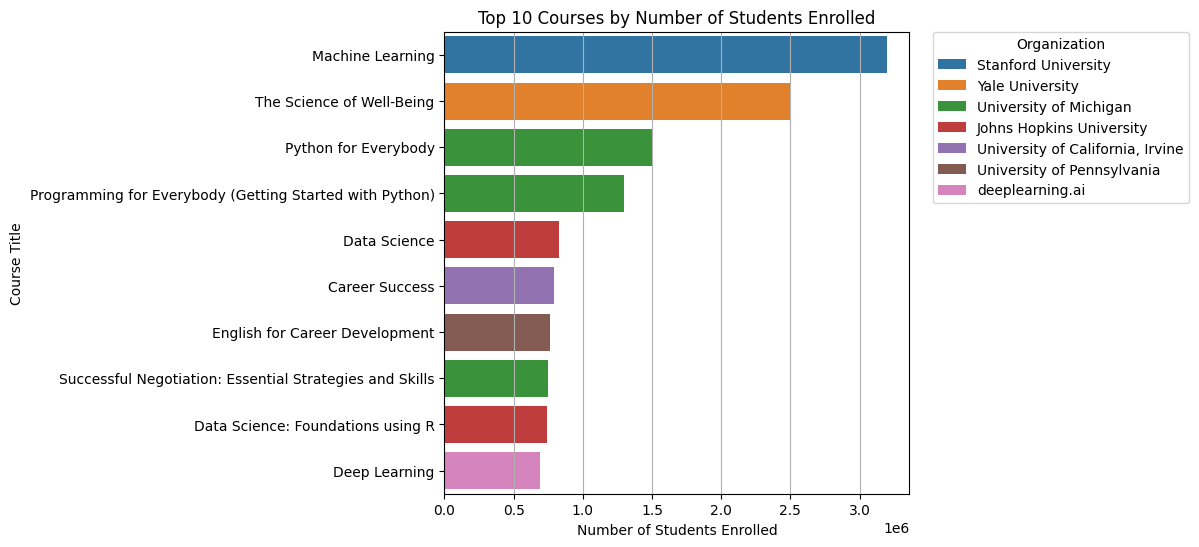

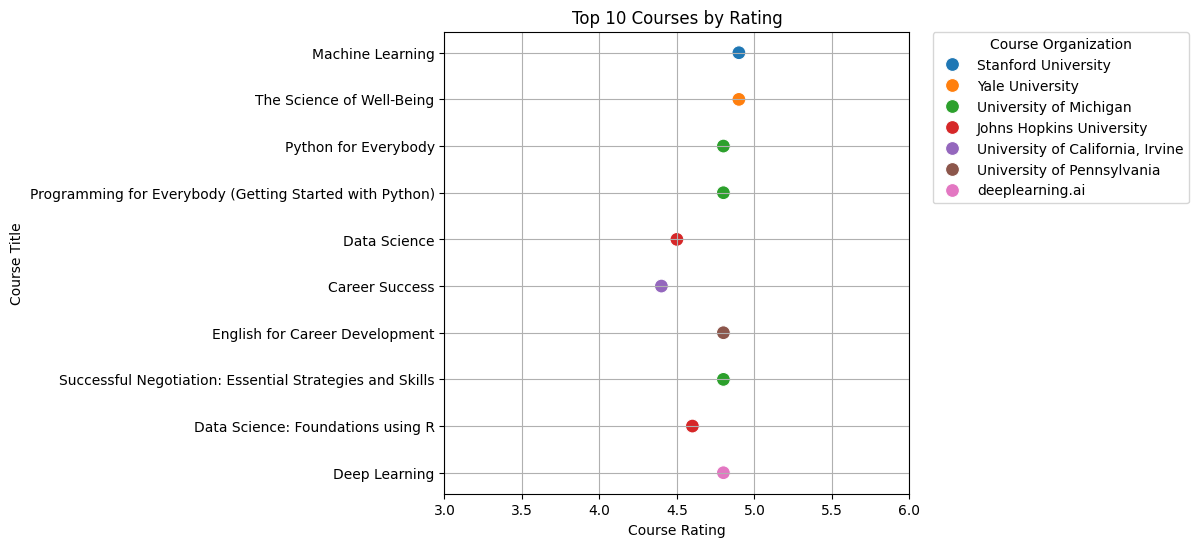

In [11]:
top_courses = courses_data.nlargest(10, 'course_students_enrolled')

# Bar plot
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='course_students_enrolled',
            y='course_title',
            hue='course_organization',
            data=top_courses)

# Rotating x-axis labels for better visibility
plt.xticks(rotation='horizontal')

# Display grid only on x-axis
ax.grid(True, axis='x')

# Plot the top 10 courses and organizations
plt.title('Top 10 Courses by Number of Students Enrolled')
plt.xlabel('Number of Students Enrolled')
plt.ylabel('Course Title')
plt.legend(title='Organization',
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)

# Plot the ratings of the top 10 courses and organizations
plt.figure(figsize=(6, 6))
sns.scatterplot(data=top_courses,
                y='course_title',
                x='course_rating',
                hue='course_organization',
                s=100)
plt.title('Top 10 Courses by Rating')
plt.xlabel('Course Rating')
plt.ylabel('Course Title')
plt.legend(title='Course Organization',
           bbox_to_anchor=(1.05, 1),
           loc=2, borderaxespad=0.)
plt.grid(True)
plt.xlim(3, 6)
plt.show()

### 1.2 - Distribution between students enrolled by course title - Bottom 10 schools and ratings
Based on the analysis above it is interesting to see what are the less popular courses and the relation between the enrolled students.

Interesting to see that even the less popular courses have a high rating grade, similar to the most popular ones. The course that has fewer students (1500 enrolled students) is one of the ones with the top rating grade (5.0).

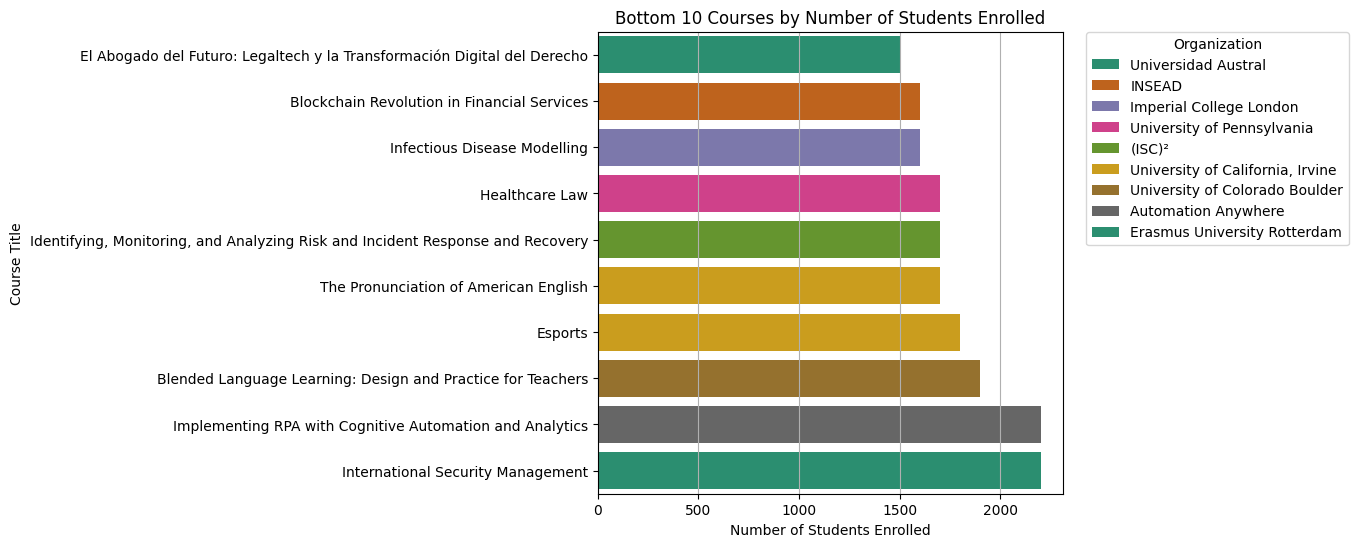

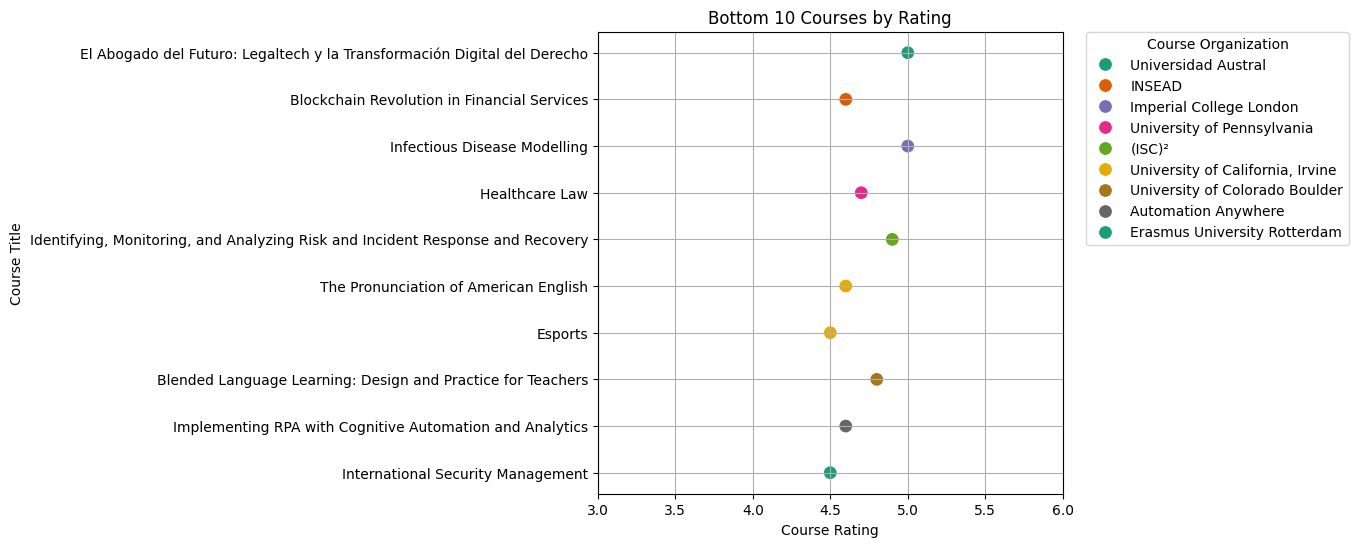

In [12]:
import warnings
# Ignore UserWarning - issing glyphs (character representations) -
# CJK (Chinese, Japanese, Korean) characters
warnings.filterwarnings('ignore', category=UserWarning)

bottom_courses = courses_data.nsmallest(10, 'course_students_enrolled')

# Define a color palette for the organizations
color_palette = sns.color_palette(
    'Dark2', n_colors=len(bottom_courses['course_organization'].unique()))

# Bar plot
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='course_students_enrolled',
            y='course_title',
            hue='course_organization',
            data=bottom_courses,
            palette=color_palette)

# Rotating x-axis labels for better visibility
plt.xticks(rotation='horizontal')

# Display grid only on x-axis
ax.grid(True, axis='x')

# Plot the bottom 10 courses and organizations
plt.title('Bottom 10 Courses by Number of Students Enrolled')
plt.xlabel('Number of Students Enrolled')
plt.ylabel('Course Title')
plt.legend(title='Organization',
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)

# Plot the ratings of the bottom 10 courses and organizations
plt.figure(figsize=(6, 6))
sns.scatterplot(data=bottom_courses,
                y='course_title',
                x='course_rating',
                hue='course_organization',
                palette=color_palette,
                s=100)
plt.title('Bottom 10 Courses by Rating')
plt.xlabel('Course Rating')
plt.ylabel('Course Title')
plt.legend(title='Course Organization',
           bbox_to_anchor=(1.05, 1),
           loc=2, borderaxespad=0.)
plt.grid(True)
plt.xlim(3, 6)
plt.show()

### 1.3 - Number of courses offered by Universities / Companies (Top 10)

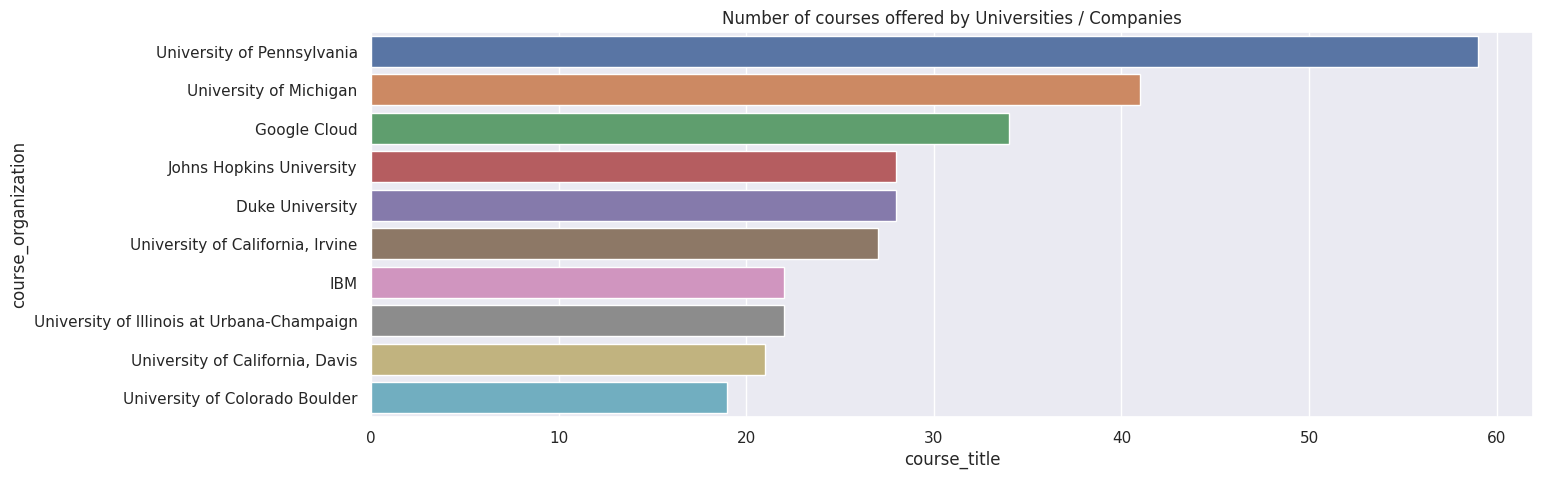

In [14]:
#%pycodestyle_on
top = courses_data['course_organization'].value_counts().nlargest(10)
top = pd.DataFrame({'course_organization': top.index,
                       'course_title': top.values})

sns.set_theme(rc={'figure.figsize':(15,5)})

ax = sns.barplot(x='course_title',
                 y='course_organization',
                 hue='course_organization',
                 data=top)
ax.set_title("Number of courses offered by Universities / Companies")

plt.show()

### 1.4 - Number of students enrolled by Universities / Companies (Top 10)

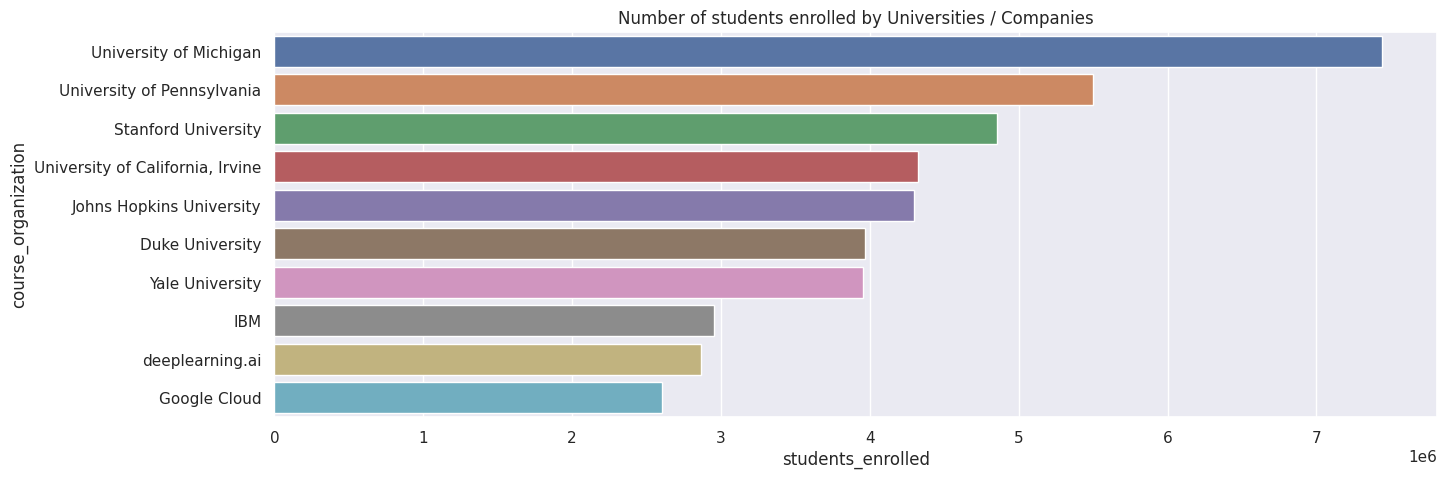

In [15]:
#%pycodestyle_on
result = (
    courses_data.groupby('course_organization')['course_students_enrolled']
    .sum()
    .nlargest(10)
)
result = pd.DataFrame({'course_organization': result.index,
                       'students_enrolled': result.values})

sns.set_theme(rc={'figure.figsize':(15,5)})

ax = sns.barplot(x='students_enrolled',
                 y='course_organization',
                 hue='course_organization',
                 data=result)
ax.set_title("Number of students enrolled by Universities / Companies")

plt.show()

### 1.5 - Conclusion between students enrolled by course title, including schools, ratings and number of courses offered
#### Top 10
As a conclusion from the above charts, it is possible to see that the most popular courses have a high rating grade, and the less popular courses have a high rating grade as well. It is interesting to see that the number of students enrolled does not affect the rating grade.
Also based on the Top 10 schools chart, the most popular course is "Machine Learning" with 3.2 million students from Stanford University. But there is just one course from this university. The University of Michingan, however, has 3 courses in the top 10 most popular courses with more than 3.5 million students enrolled on these 3 courses. Johns Hopkins University have each one 2 courses on the top 10.
By looking at the number of courses offered by Universities / Companies (Top 10), The Univeristy of Pennsylvania has the most courses offered (almost 60), but with only one course on the Top 10 rank, followed by Univerisy of Michigan, with more than 40 courses but only 3 on the Top 10 and and Google Cloud with more than 30 but no courses on the Top 10.
The number of students enrolled by Universities / Companies (Top 10) shows that the University of Michigan has the most students enrolled, with more than 7 million. The University of Pennsylvania has the second most students enrolled, with roughly 5.5 million, followed by Stanford University with almost 5 million and the most popular course "Machine Learning".
#### Bottom 20
The less popular courses have a high rating grade, similar to the most popular ones. The course that has fewer students (1500 enrolled students) is one of the ones with the top rating grade (5.0), including the third less popular course with the same rating grade. The University of California (Irvine) has 2 courses within the 10 less popular courses.
#### Ratings
Interesting to note that looking at the two scater plots (Top 10 and Bottom 10), it is possible to see that the rating grade is not affected by the number of students enrolled. The two scater plots have similar distribution of ratings, with the majority of courses with a rating grade of 4.5 and 5.0. The scale rating was equilized from 3.0 to 6.0, so the rating distribution can lead to a proper analysis between the two graphs.

### 2.1 - Distributions and correlation of course rating and student enrolled

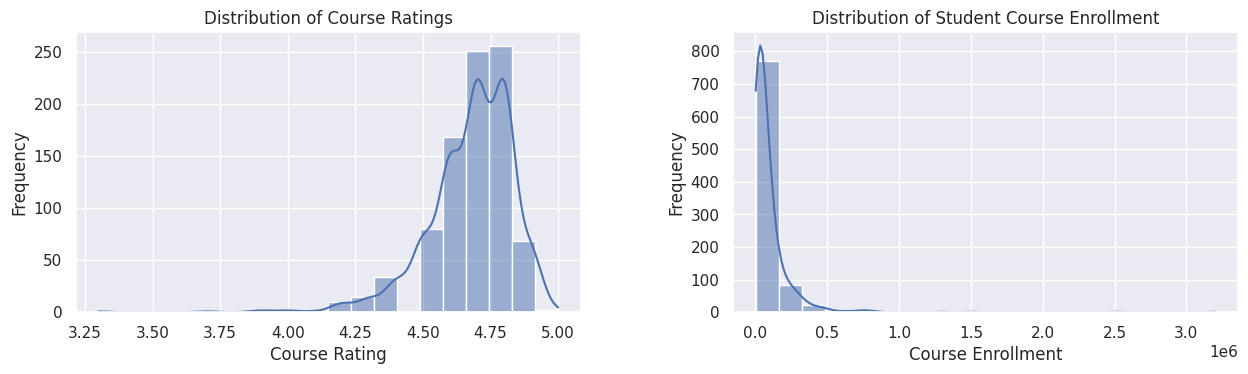

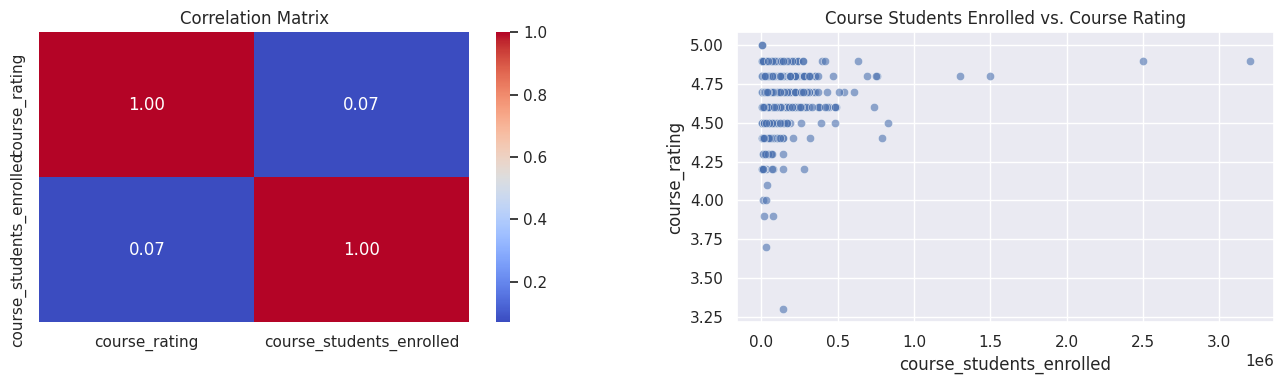

In [17]:
#%pycodestyle_on

plt.figure(figsize=(15, 8))

# First Plot:
plt.subplot(2, 2, 1)
sns.histplot(data=courses_data, x='course_rating', bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplots_adjust(wspace=0.3)

# Second Plot:
plt.subplot(2, 2, 2)
sns.histplot(data=courses_data, x='course_students_enrolled', bins=20, kde=True)
plt.title('Distribution of Student Course Enrollment')
plt.xlabel('Course Enrollment')
plt.ylabel('Frequency')
plt.grid(True)

# Second line plots
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

numeric_df = courses_data.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()

# Third Plot: Correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",
            fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix")

# Fourth Plot:
sns.scatterplot(data=courses_data, x='course_students_enrolled',
                y='course_rating', alpha=0.6, ax=axes[1])
axes[1].set_title('Course Students Enrolled vs. Course Rating')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

### 2.2 - Conclusion for distributions and correlation of course rating and student enrolled
The histogram and density plot below provide a graphical representation of the distribution of the `course_rating` and `course_students_enrolled` features. It shows the frequency of the ratings and enrollments and how they are distributed. The density plot is a smoothed, continuous version of the histogram, which is used to estimate the probability density function of the ratings and enrollments. It is often created using a Kernel Density Estimate (KDE) and shows the distribution of the data as a continuous curve. It can reveal patterns in the data that may not appear in the histogram.

Here the histogram is created to understand the distribution of ratings and students enrollments and it is defined by the number of bins, which is 20 in this case. The density plot (continuos curve) estimates the probability density function of both features.

For **Distribution of Course Ratings** histogram, it is possible to see that the majority of the ratings are between 4.5 and 4.8, with a peak around 4.75. The distribution is approximately normal, with a slight skew to the right. Also we can see the KDE curve, showing the distribution of the ratings.

For **Distribution of Student Course Enrollment** histogram, it is possible to see the number of enrolled students in courses is distributed. The first bin shows that a large number of courses have a relatively small number of enrolled students, while the second bin shows that fewer courses have a slightly higher number of enrolled students. The distribution is right-skewed and the KDE curve shows the distribution of the enrollments.

The correlation matrix below shows the relationship between the numerical variables in the dataset.

For this dataset, I have computed the correlation matrix for the numeric variables in the courses_data dataset. The numeric variables include `course_rating` and `course_students_enrolled`.

The correlation coefficient between `course_rating` and `course_students_enrolled` is 0.07. This indicates a _weak positive correlation_, suggesting that there is a _weak slight tendency for courses with higher ratings to have more students enrolled_. However, the correlation is not strong enough to make a definitive conclusion, but because it's still positive, it suggests a slight tendency for the two variables to increase together. That's why there is a slight tendency for courses with higher ratings to have more students enrolled.

From the plot, we can observe that the majority of the courses have an enrollment number between 0.0 and 0.5 (in millions), and majority of the ratings are between 4.5 and 4.8, with a peak around 4.75. This suggests that most of the courses on the platform are highly rated and have the majority of students enrolled.

This could mean that courses with higher ratings tend to have more students enrolled, suggesting that students prefer to enroll in courses with higher ratings. However, as seen before, although there is a very weak positive correlation between `course_rating` and `course_students_enrolled` it is hard to confirm that this is a pattern.

### 3.1 - Distribution of course difficulty levels and course ratings graphs

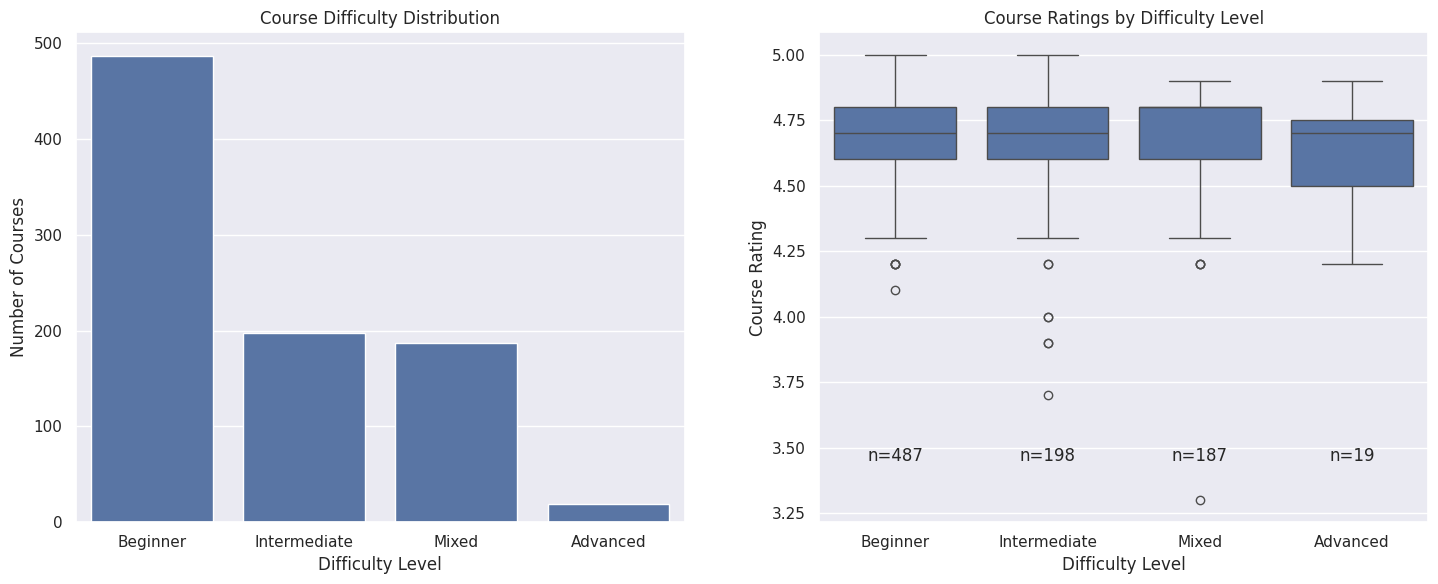

In [18]:
# Defining the order of the difficulty levels
order = ['Beginner', 'Intermediate', 'Mixed', 'Advanced']

plt.figure(figsize=(15, 6))

# First plot: Distribution of Course Difficulty Levels
plt.subplot(1, 2, 1)
sns.countplot(data=courses_data, x='course_difficulty')
plt.title('Course Difficulty Distribution')
plt.ylabel('Number of Courses')
plt.xlabel('Difficulty Level')

# Second plot: Course Ratings by Difficulty Level
plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=courses_data, x='course_difficulty',
                      y='course_rating', order=order)
plt.title('Course Ratings by Difficulty Level')
plt.ylabel('Course Rating')
plt.xlabel('Difficulty Level')

# Calculate rating counts for each difficulty level
rating_counts = courses_data.groupby('course_difficulty')['course_rating'].count()

# Add rating counts as text on the boxplot
for i in range(len(rating_counts)):
    boxplot.text(i, courses_data['course_rating'].min() + 0.15,
                 'n=' + str(rating_counts[order[i]]),
                 horizontalalignment='center')

plt.subplots_adjust(wspace=200)  # Adjust the space between the subplots
plt.tight_layout()
plt.show()

### 3.2 - Conclusion for distributions of course difficulty levels and course ratings comparison
The two plots below are used to visualize the distribution of the course difficulty levels and to compare the course ratings by difficulty level.

The first one shows the number of courses for each difficulty level. The difficulty levels are divided into 4 categories: Beginner, Intermediate, Mixed, and Advanced.

In this case, it suggests that the course offerings are skewed toward certain difficulty levels. In this case the Beginner level.

Then it was decided to compare the course ratings by difficulty level. The second plot shows the average course ratings for each difficulty level.

Analysing both plots, it is possible to see that the difficulty level does not have a significant impact on the course ratings. The median ratings for all difficulty levels are very similar, and the distribution of ratings is also quite similar. This suggests that the difficulty level of a course does not have a strong relationship with the course ratings.

### 4.1 - Impact on ratings and enrollments by certification type graphs

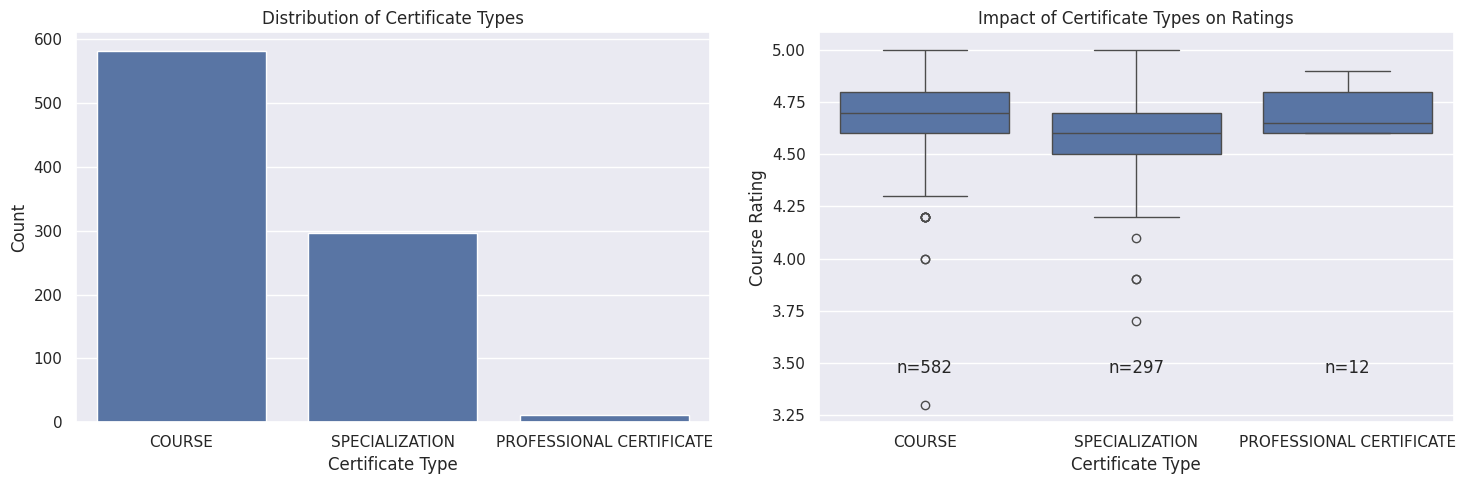

In [19]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ordering columns output
order = ['COURSE', 'SPECIALIZATION', 'PROFESSIONAL CERTIFICATE']

# Bar plot for distribution of certificate types
sns.countplot(data=courses_data, x='course_Certificate_type',
              ax=axes[0], order=order)
axes[0].set_title('Distribution of Certificate Types')
axes[0].set_xlabel('Certificate Type')
axes[0].set_ylabel('Count')

# Boxplot for Impact of Certificate Types
sns.boxplot(data=courses_data, x='course_Certificate_type',
            y='course_rating', ax=axes[1], order=order)
axes[1].set_title('Impact of Certificate Types on Ratings')
axes[1].set_xlabel('Certificate Type')
axes[1].set_ylabel('Course Rating')

rating_counts = courses_data['course_Certificate_type'].value_counts()

# Add rating counts as text on the second boxplot
for i in range(len(rating_counts)):
    axes[1].text(i, courses_data['course_rating'].min() + 0.15,
                 'n=' + str(rating_counts[i]),
                 horizontalalignment='center')

plt.tight_layout()
plt.show()

### 4.2 - Conclusion for the impact on ratings and enrollments by certification type
The majority of courses offered by the organizations are for the Course certificate type, followed by Specialization and Professional Certificates.

In this case, since the ratings does not present significant change between the three types of certification, it is fair to say that the ratings does not have impact over the kind of certification type.

### 5.1 - Distribution of course difficulty levels and the number of students enrolled graphs

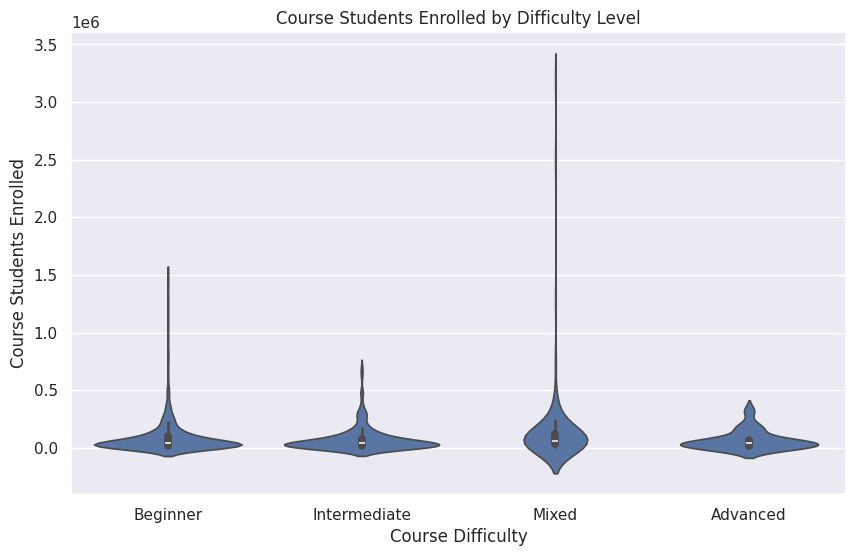

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=courses_data, x='course_difficulty',
               y='course_students_enrolled')
plt.title('Course Students Enrolled by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Students Enrolled')
plt.show()

### 5.2 - Conclusion for distribution of course difficulty levels and the number of students enrolled
Considering the difficulty level courses, for the beginner, intermediate, and advanced levels, the plot below shows the shape and width with similar formats, which suggests that the distribution of students enrolled in these courses is similar across these difficulty levels. This could mean that the number of students enrolled does not vary significantly with course difficulty, at least for these three levels.

But for the mixed level, the distribution is different, with a less wide but stretching to the top of the graph suggests that there is less variation in the number of students enrolled in 'Mixed' difficulty courses (hence the narrower width), but that there are some 'Mixed' difficulty courses with a very high number of students enrolled (hence the stretch to the top of the graph).

### Suggestions and improvements for this analysys

I believe that if the dataset had more features, it would be possible to analyze the impact of other variables on the ratings and enrollments. For example, it would be interesting to analyze the impact of the course duration and the number of reviews. Especially the course duration, since it is a feature that can impact the number of students enrolled and the ratings. Dates and timestamps are always good features to be analyzed against others.
In my analysis, I tried to make it simple and not extensive, but it was difficult to find a balance between what should be done as an essential analysis and what could be considered as non-essential. I think the analysis could be improved by adding more features and trying different approaches. I think code refactoring could also reduce the number of code lines and probably enhance performance and ease readability.
I also think that the storelling can be more attractive, with more creativity. More analysis can be done but at this moment there is a lack of practice and knowledge on how to structure not only on how to present the data analysis but the storetelling skills as well.
Maybe uploading the dataset is not a good practice and I think that could be done by the user and loading the dataset to the proper folder. This can be done by addressing the correct URL and a proper code to save the data into the correct folder.